In [1]:
import pandas as pd
import time
from os.path import join
import json 
import numpy as np 
from tqdm import tqdm
import seaborn as sns
from os import listdir, path
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
from matplotlib.colors import ListedColormap
import plotly.graph_objs as go
# make a train test split 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

import xgboost as xgb



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 8.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python -m pip install --upgrade pip


In [71]:

output_file = '../data/processed/training_data/df_failures_telemetry_agg.parquet'
output_ventanas_fallas = '../data/processed/training_data/df_ventanas_fallas.parquet'
output_ventanas_sin_fallas = '../data/processed/training_data/df_ventanas_sin_fallas.parquet'

In [72]:
df_fallas = pd.read_parquet(output_ventanas_fallas)
df_sin_fallas = pd.read_parquet(output_ventanas_sin_fallas)


In [73]:
df_fallas.shape

(29050, 9)

In [74]:
df_sin_fallas.shape

(29050, 9)

In [57]:
!python  '/workspaces/predictive_maintenance/src/agg_telemetry.py'

In [75]:
df_failures_telemetry_path  = '../data/processed/training_data/df_failures_telemetry_agg.parquet'

df_failures_telemetry_agg = pd.read_parquet(df_failures_telemetry_path)


In [76]:
df_failures_telemetry_agg

,mean_volt,mean_rot,mean_press,mean_vib,max_volt,max_rot,max_press,max_vib,min_volt,min_rot,min_press,min_vib,std_volt,std_rot,std_press,std_vib,failure_binary,failure
id_falla,,,,,,,,,,,,,,,,,,
0,172.572582,452.566439,100.071471,48.498117,215.656488,568.972310,127.014498,66.764515,129.016707,365.213804,80.668287,31.279321,16.169678,41.306532,11.191080,7.738816,1,4
1,185.768948,451.277803,101.229558,40.419562,216.930340,578.744306,117.308568,49.029715,149.968203,354.540120,74.378060,31.649319,16.843305,51.137143,9.357601,4.922864,1,1
2,172.248383,428.527452,99.715337,39.008680,209.239090,613.356453,116.101142,53.122824,142.494330,279.695062,82.634395,23.596790,15.460410,61.929052,7.926572,5.317362,1,2
3,173.042835,469.686735,99.639232,43.047066,202.610866,581.811206,126.893326,61.150030,138.300867,381.047123,81.351236,29.443212,15.000374,45.106145,8.230975,6.797760,1,4
4,170.742844,450.795334,97.531422,44.164210,207.324122,586.839392,120.031518,58.889644,134.330585,365.843949,78.964788,29.762822,13.984963,45.070603,9.908276,7.301122,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,168.024500,437.255054,99.804878,40.375813,202.300647,513.909377,128.026930,50.060218,128.644254,353.372588,79.898637,28.535890,15.156412,39.826765,10.345432,4.418344,0,0
812,167.768104,438.080313,100.045638,40.262363,202.300647,513.909377,128.026930,50.060218,128.644254,353.372588,79.898637,28.535890,15.513498,40.717146,10.409034,4.514615,0,0
813,167.793104,439.581626,99.629850,40.184088,202.300647,513.909377,128.026930,50.060218,128.644254,353.372588,77.389444,28.535890,15.534755,41.478607,10.889263,4.517014,0,0


### Definicion de funciones

In [177]:
def train_logistic_regression(X_train, y_train):
    # Entrenar modelo de regresión logística
    #lr_model = LogisticRegression(random_state=42,class_weight="balanced")
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train, y_train)
    return lr_model


def train_knn(X_train, y_train):
    # Entrenar modelo de KNN
    knn_model = KNeighborsClassifier(n_neighbors=20)
    knn_model.fit(X_train, y_train)
    return knn_model

def train_random_forest(X_train, y_train):
    rf_model = RandomForestClassifier(n_estimators=20, random_state=42,max_depth=3)
    rf_model.fit(X_train, y_train)
    return rf_model

def train_xgboost(X_train, y_train):
    # Entrenar modelo de XGBoost
    xgb_model = xgb.XGBClassifier(n_estimators=20, learning_rate=0.1, max_depth=3, random_state=0,alpha=0.5)
    xgb_model.fit(X_train, y_train)
    return xgb_model

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Calcular la exactitud en el conjunto de entrenamiento
    train_accuracy = model.score(X_train, y_train)

    # Realizar predicciones en los datos de prueba y calcular la exactitud y la matriz de confusión
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    return train_accuracy, test_accuracy, confusion

def plot_confusion_matrix(confusion, model_name):
    # Graficar matriz de confusión para un modelo dado
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion, annot=True, fmt='.2f', cmap="Blues", cbar=False)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Matriz de confusión - " + model_name)
    plt.show()


def split_data(X, y, test_size=0.2, random_state=42):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

In [178]:
df_failures_telemetry_agg.columns

Index(['mean_volt', 'mean_rot', 'mean_press', 'mean_vib', 'max_volt',
       'max_rot', 'max_press', 'max_vib', 'min_volt', 'min_rot', 'min_press',
       'min_vib', 'std_volt', 'std_rot', 'std_press', 'std_vib',
       'failure_binary', 'failure'],
      dtype='object')

In [179]:
features = ['mean_volt', 'mean_rot', 'mean_press', 'mean_vib', 'max_volt',
       'max_rot', 'max_press', 'max_vib', 'min_volt', 'min_rot', 'min_press',
       'min_vib', 'std_volt', 'std_rot', 'std_press', 'std_vib']



target = 'failure'

In [180]:
# Seleccionar características y variable objetivo
X = df_failures_telemetry_agg[features]
y = df_failures_telemetry_agg[target]

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<AxesSubplot: >

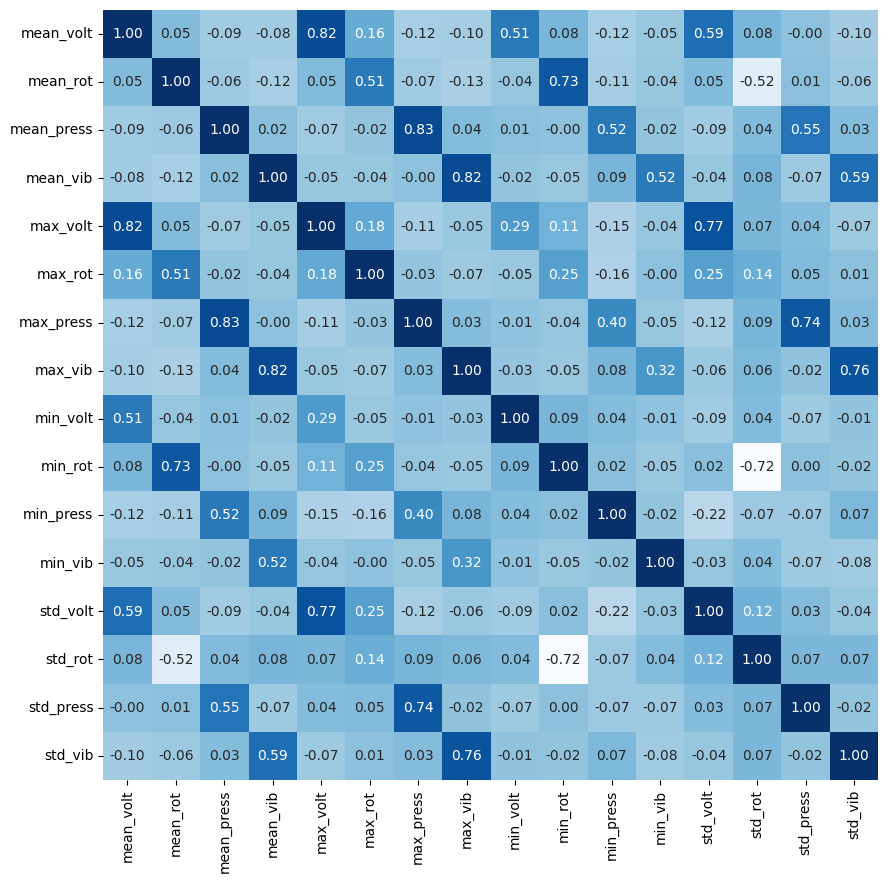

In [181]:
# plot a correlation matrix of X_train
corr = X_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap="Blues", cbar=False)

In [182]:
#train a logistic regression model
lr_model = train_logistic_regression(X_train, y_train)
# train a knn model
knn_model = train_knn(X_train, y_train)
# train a random forest model
rf_model = train_random_forest(X_train, y_train)
# train a xgboost model
xgb_model = train_xgboost(X_train, y_train)

# evaluate_model lr 
train_accuracylr, accuracylr,  confusionlr = evaluate_model(lr_model, X_train, y_train, X_test, y_test)
# evaluate_model knn
train_accuracyrf, accuracyknn, confusionknn = evaluate_model(knn_model, X_train, y_train, X_test, y_test)
# evaluate_model rf
train_accuracyrf, accuracyrf, confusionrf = evaluate_model(rf_model, X_train, y_train, X_test, y_test)
# evaluate_model xgb
train_accuracyxgb, accuracyxgb, confusionxgb = evaluate_model(xgb_model, X_train, y_train, X_test, y_test)





/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Exactitud del modelo de regresión logística:  0.7696447793326158 0.7682403433476395


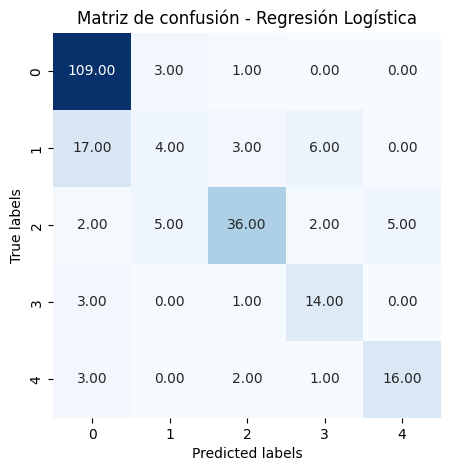

Exactitud del modelo de KNN:  0.790096878363832 0.7253218884120172


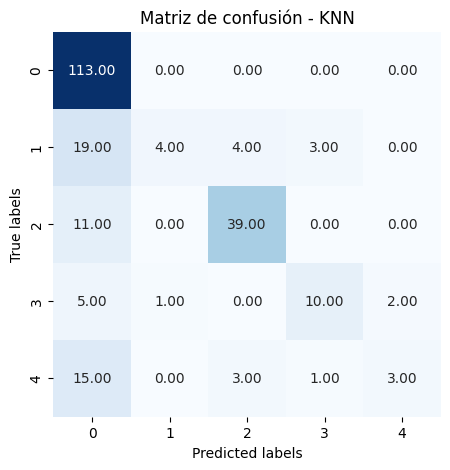

Exactitud del modelo de Random Forest:  0.790096878363832 0.7939914163090128


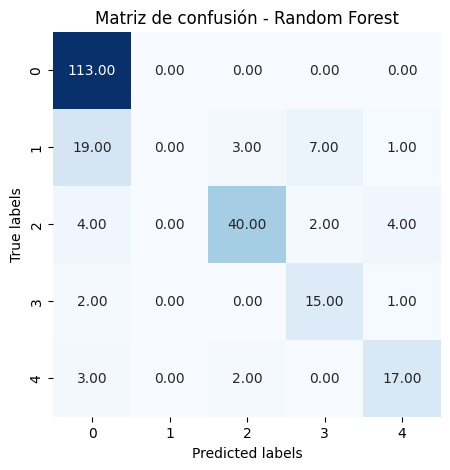

Exactitud del modelo de XGBoost:  0.9095801937567277 0.8369098712446352


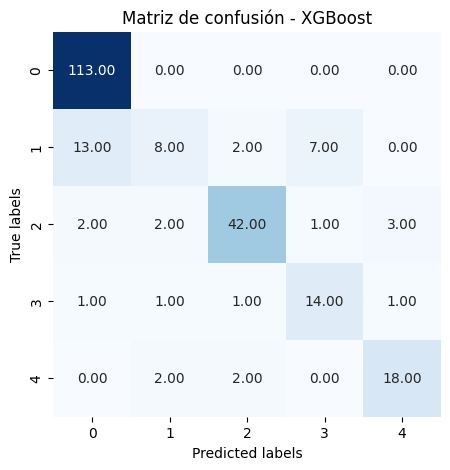

In [184]:
print ("Exactitud del modelo de regresión logística: ",train_accuracylr,  accuracylr)
plot_confusion_matrix(confusionlr, "Regresión Logística")

print ("Exactitud del modelo de KNN: ", train_accuracyrf, accuracyknn)
plot_confusion_matrix(confusionknn, "KNN")

# evaluate_model rf
print ("Exactitud del modelo de Random Forest: ",train_accuracyrf,  accuracyrf)
plot_confusion_matrix(confusionrf, "Random Forest")

# evaluate_model xgb
print ("Exactitud del modelo de XGBoost: ",train_accuracyxgb,  accuracyxgb)
plot_confusion_matrix(confusionxgb, "XGBoost")


